# GBDT梯度提升决策树

>详情参考：https://blog.csdn.net/luanpeng825485697/article/details/79766455

GBDT全称梯度下降树，在传统机器学习算法里面是对真实分布拟合的最好的几种算法之一。

GBDT(Gradient Boosting Decision Tree) 又叫 MART（Multiple Additive Regression Tree)，是一种迭代的决策树算法，该算法由多棵决策树组成，所有树的结论累加起来做最终答案。

它在被提出之初就和SVM一起被认为是泛化能力较强的算法。

GBDT中的树是回归树（不是分类树），GBDT用来做回归预测，调整后也可以用于分类。

回归树可以参考http://blog.csdn.net/luanpeng825485697/article/details/78795504

提升树利用加法模型和前向分步算法实现学习的优化过程。当损失函数是平方损失和指数损失函数时，每一步的优化很简单，如平方损失函数学习残差回归树。

但对于一般的损失函数，往往每一步优化没那么容易，如绝对值损失函数和Huber损失函数。

针对这一问题，Freidman提出了梯度提升算法：利用最速下降的近似方法，即利用损失函数的负梯度在当前模型的值，作为回归问题中提升树算法的残差的近似值，拟合一个回归树。

所以说GBDT是通过采用加法模型（即基函数的线性组合），以及不断减小训练过程产生的残差来达到将数据分类或者回归的算法。

**算法步骤解释：**

1、初始化，估计使损失函数极小化的常数值，它是只有一个根节点的树，即ganma是一个常数值。

2、

（a）计算损失函数的负梯度在当前模型的值，将它作为残差的估计

（b）估计回归树叶节点区域，以拟合残差的近似值

（c）利用线性搜索估计叶节点区域的值，使损失函数极小化

（d）更新回归树

3、得到输出的最终模型 f(x)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/e9d1dc2679d22dc1f207fd2561862ee4.png)

GBDT通过多轮迭代,每轮迭代产生一个弱分类器，每个分类器在上一轮分类器的残差基础上进行训练。

对弱分类器的要求一般是足够简单，并且是低方差和高偏差的。因为训练的过程是通过降低偏差来不断提高最终分类器的精度。

弱分类器一般会选择为CART 树（也就是分类回归树）。

由于上述高偏差和简单的要求 每个分类回归树的深度不会很深。最终的总分类器 是将每轮训练得到的弱分类器加权求和得到的（也就是加法模型）。

# xgboost

>详情参考：https://blog.csdn.net/luanpeng825485697/article/details/79766455

如果不考虑工程实现、解决问题上的一些差异，xgboost与gbdt比较大的不同就是目标函数的定义。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/a7bb69773c1e8c19e4fba3f8017d6573.png)

注：

红色箭头指向的l即为损失函数；

红色方框为正则项，包括L1、L2；红色圆圈为常数项。

xgboost利用泰勒展开三项，做一个近似，我们可以很清晰地看到，最终的目标函数只依赖于每个数据点的在误差函数上的一阶导数和二阶导数。

# 模型融合：bagging、Boosting、Blending、Stacking

上面我们已经学习了集成学习的Bagging、Boosting，下面我们来看看还有那些模型融合方法。

常见的 Ensemble 方法有这么几种： 

**1、Bagging**：使用训练数据的不同随机子集来训练每个 Base Model，最后进行每个 Base Model 权重相同的 Vote。也即 Random Forest 的原理。 

**2、Boosting**：迭代地训练 Base Model，每次根据上一个迭代中预测错误的情况修改训练样本的权重。也即 Gradient Boosting，Adaboost 的原理。比 Bagging 效果好，但更容易 Overfit。 

**3、Blending**：用不相交的数据训练不同的 Base Model，将它们的输出取（加权）平均。实现简单，但对训练数据利用少了。 

**4、Stacking**：

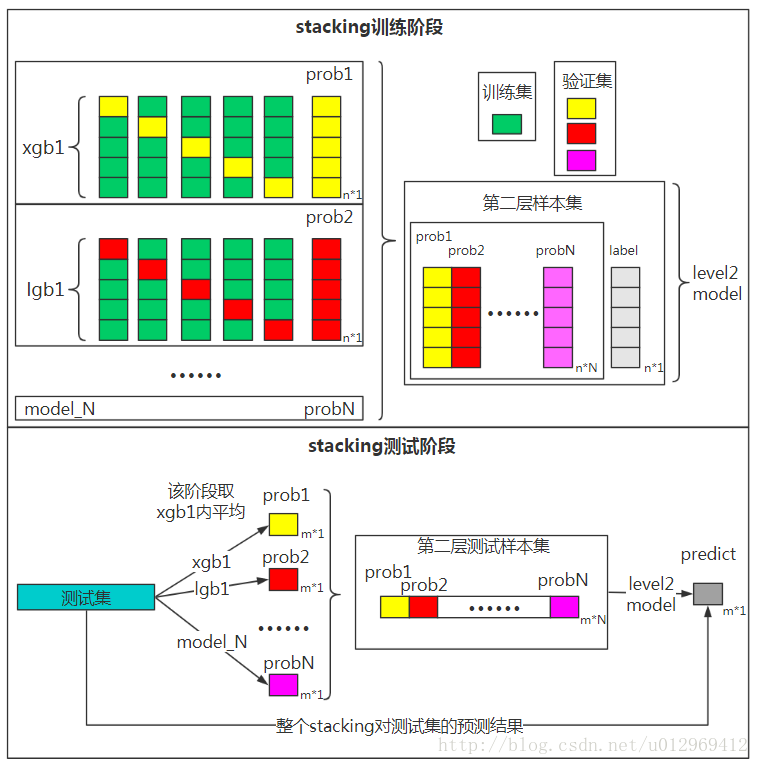

还有一种是将prob1~N列与原始数据组成新的特征向量（样本集列数+N）训练LV2模型 

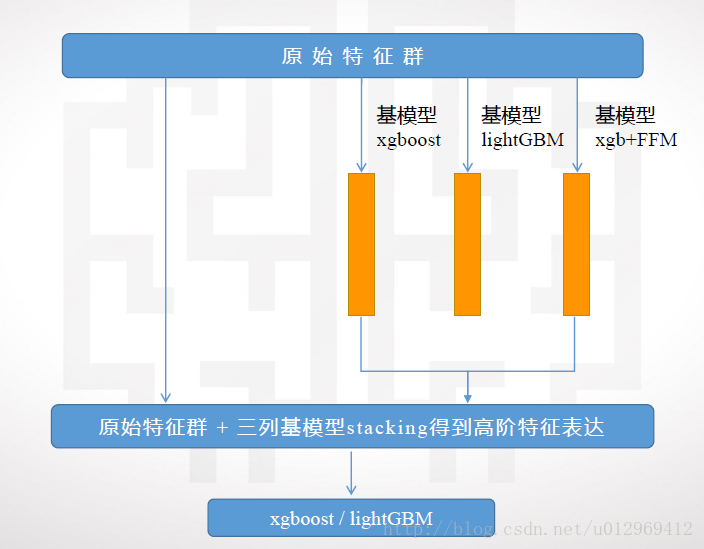